# Dimension reduction (embedding)

In [ ]:
import umap

2023-12-27 12:43:57.603666: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 12:44:04.846068: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 12:44:04.846172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 12:44:05.547220: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 12:44:06.856729: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 12:44:10.174262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [ ]:
# Import des bibliothèques utiles
import sklearn
import matplotlib.pyplot as plt

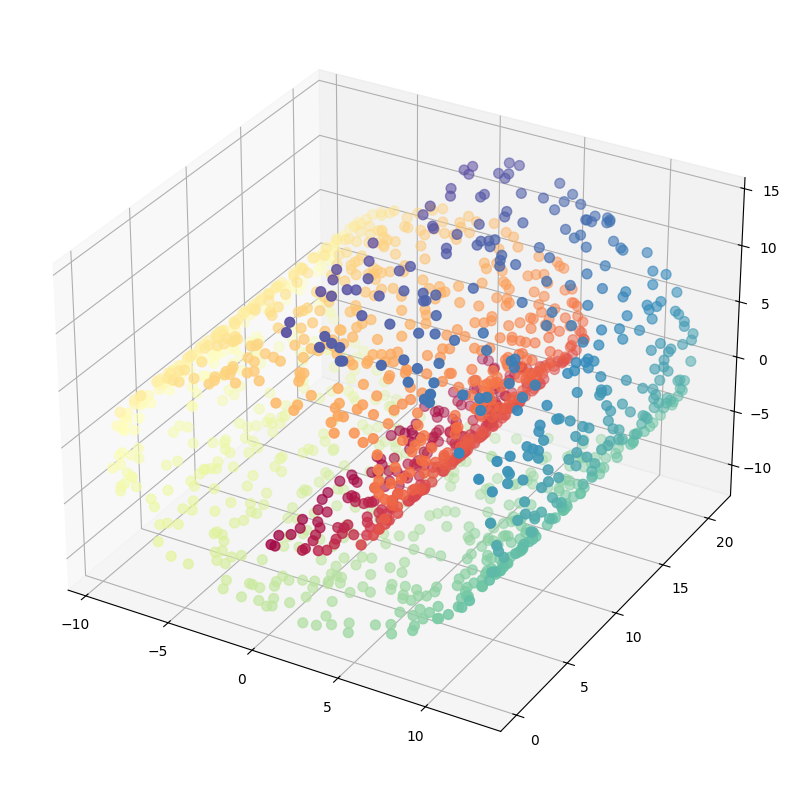

In [ ]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=1500)
/home/ab2/.cache/pypoetry/virtualenvs/recognize-handwritten-letters-WQmDEW5_-py3.10/bin/python
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, s=50, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
from umap import UMAP

um = UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
embeddings = um.fit_transform(X)

print(embeddings.shape)

/home/ab2/.cache/pypoetry/virtualenvs/recognize-handwritten-letters-WQmDEW5_-py3.10/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


(1500, 2)


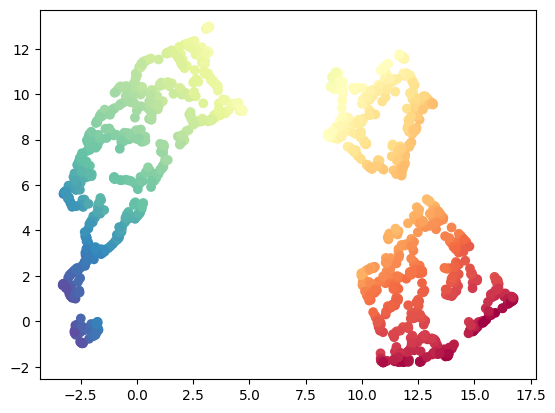

In [ ]:
plt.scatter(embeddings[:,0], embeddings[:,1], c=color, cmap=plt.cm.Spectral)
plt.show()


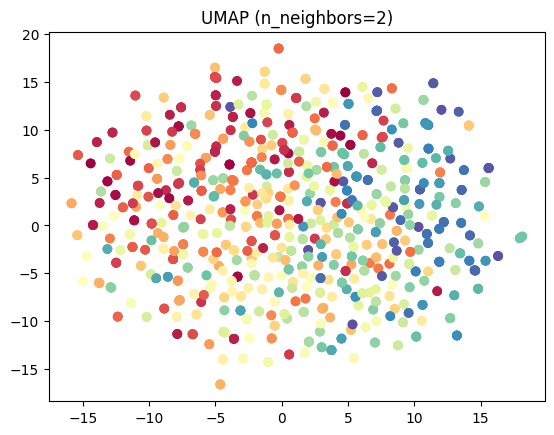

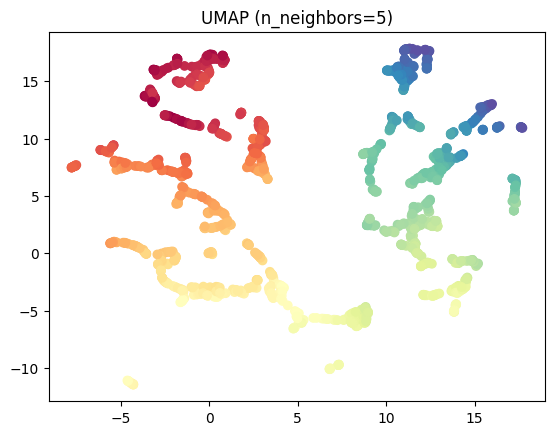

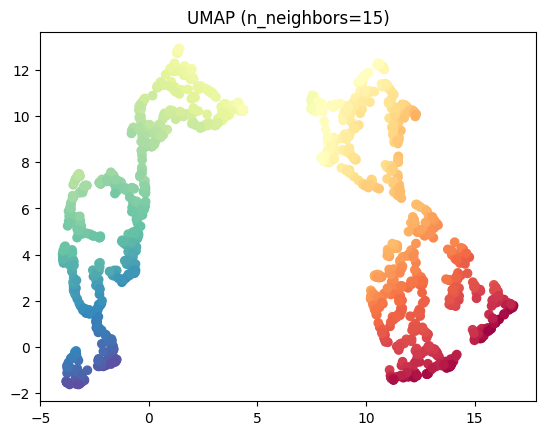

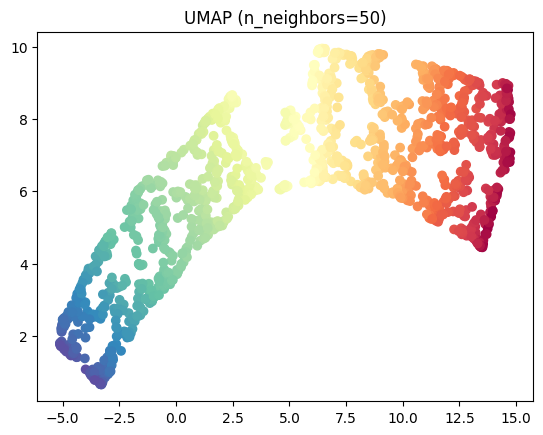

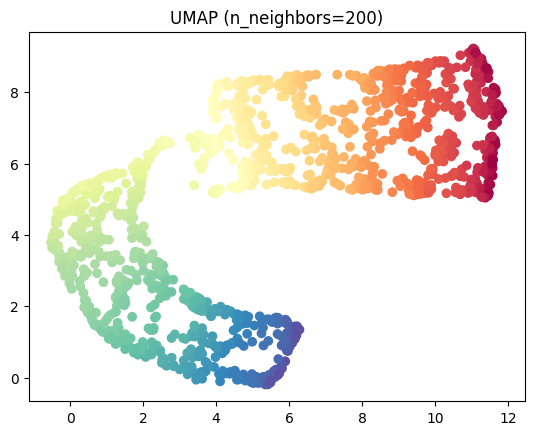

In [ ]:
for k in [2, 5, 15, 50, 200]:
        um = UMAP(n_components=2, n_neighbors=k, min_dist=0.1)
        embeddings = um.fit_transform(X)
        plt.scatter(embeddings[:,0], embeddings[:,1], c=color, cmap=plt.cm.Spectral)
        plt.title(f"UMAP (n_neighbors={k})")
        plt.show()


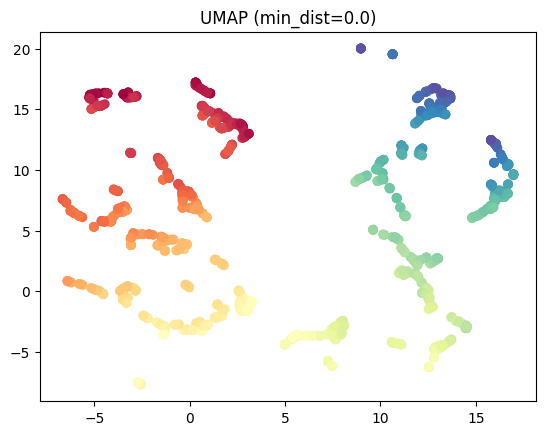

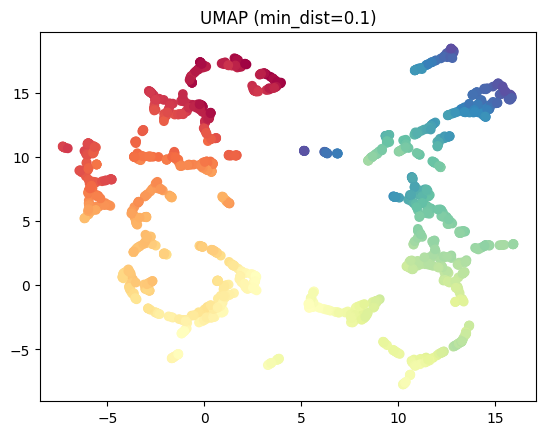

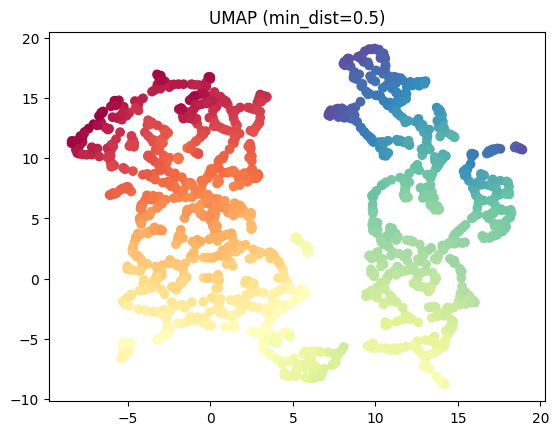

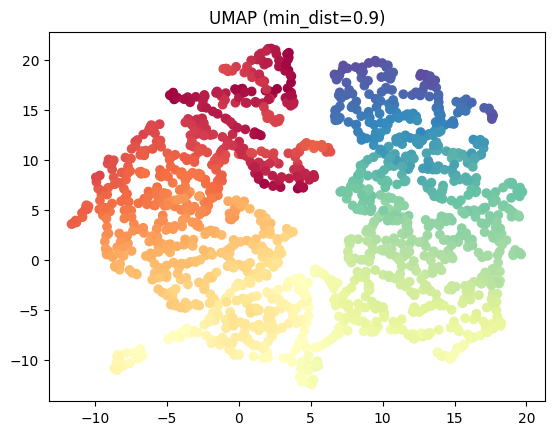

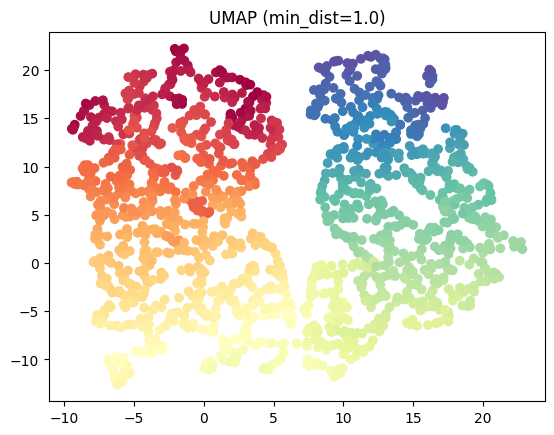

In [ ]:
for min_dist in [0.0, 0.1, 0.5, 0.9, 1.0]:
        um = UMAP(n_components=2, n_neighbors=5, min_dist=min_dist)
        embeddings = um.fit_transform(X)
        plt.scatter(embeddings[:,0], embeddings[:,1], c=color, cmap=plt.cm.Spectral)
        plt.title(f"UMAP (min_dist={min_dist})")
        plt.show()

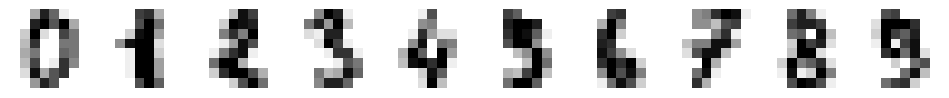

In [ ]:
from sklearn import datasets
X, y = datasets.load_digits(return_X_y=True)

fig = plt.figure(figsize=(12, 4))
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap=plt.cm.binary)
    plt.axis("off")
plt.show()


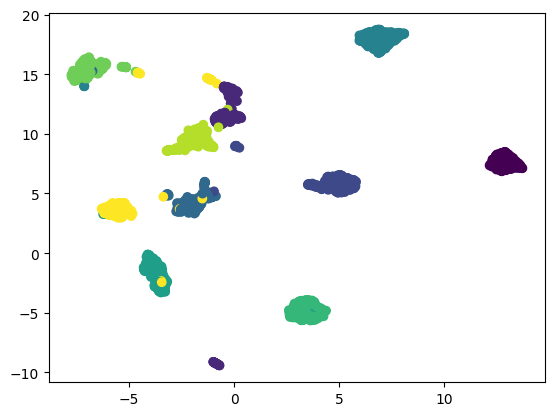

In [ ]:
import matplotlib.pyplot as plt

um = umap.UMAP()
um.fit(X)
embeddings = um.embedding_

plt.scatter(embeddings[:,0], embeddings[:,1], c=y)
plt.show()

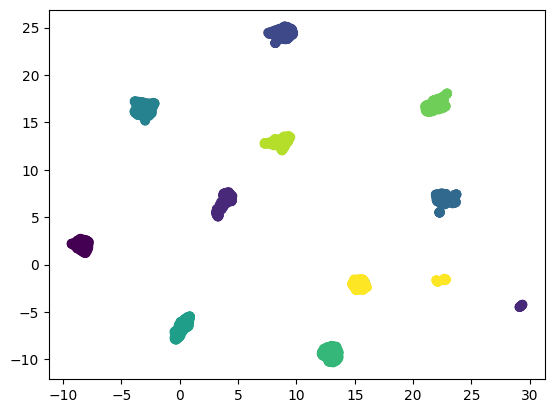

In [ ]:
um = umap.UMAP()
um.fit(X, y)
embeddings = um.embedding_

plt.scatter(embeddings[:,0], embeddings[:,1], c=y)
plt.show()


# Sklearn example

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

In [ ]:
import numpy as np
from matplotlib import offsetbox

from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    MDS,
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing NCA embedding...


NameError: name 'letters_index' is not defined

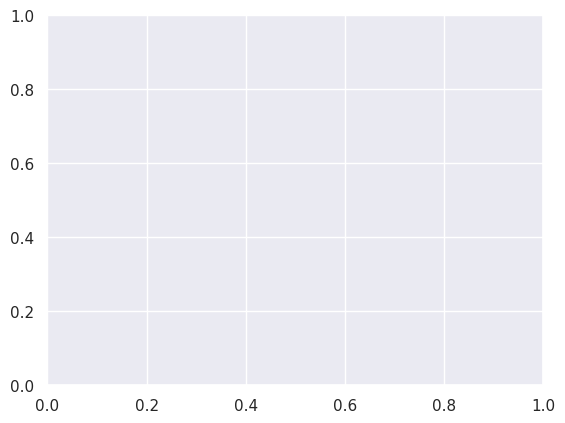

In [ ]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

# THE SAME WITH LETTERS

In [ ]:
import sys
sys.path.append(sys.path[0].replace("src/notebooks", ""))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.constants import data_folder, img_shape, nb_classes
from src.utils import init_notebook

In [ ]:
init_notebook()

In [ ]:
df = pd.read_csv(f"{data_folder}/raw/sample-dataset.csv", header=None)

In [ ]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
a = list(range(26))

In [ ]:
letters = [chr(i + ord("a")) for i in range(26)]

In [ ]:
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [ ]:
letters_index = list(range(26))

In [ ]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
X.iloc[0].to_numpy().reshape(img_shape)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 124,
        208, 208, 208, 208, 208, 103,  43,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in letters_index:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${letters[digit]}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)

        img = X[i].reshape(img_shape)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(img, cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [ ]:
embeddings = {
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing NCA embedding...


ValueError: cannot reshape array of size 2 into shape (28,28)

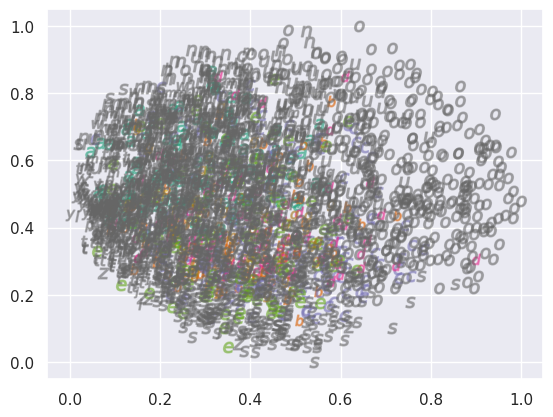

In [ ]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

In [ ]:
X.shape

(3000, 784)

In [ ]:
type(X)

pandas.core.frame.DataFrame